In [1]:
%matplotlib widget

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import colorcet as cc
from matplotlib import colormaps
from skimage.color import rgb2luv, luv2rgb

from libertem.viz import visualize_simple, CMAP_CIRCULAR_DEFAULT

In [3]:
y, x = np.mgrid[-100:100, -100:100]

In [4]:
ywave = y + np.sin(y) * 4
xwave = x + np.sin(x) * 4
zwave = np.zeros_like(ywave)

In [5]:
vec = np.stack((ywave, xwave, zwave), axis=-1)

In [6]:
l = np.linalg.norm(vec, axis=-1)

In [7]:
vec[l>100] = 0

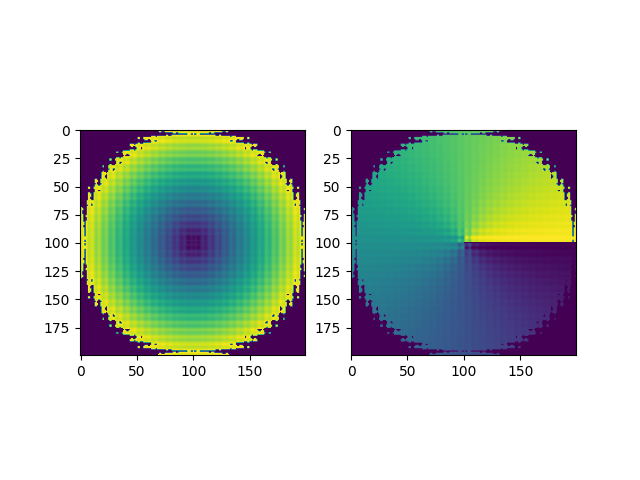

In [8]:
fig, axes = plt.subplots(1, 2)
absval = np.linalg.norm(vec, axis=-1)
angle = np.arctan2(-vec[..., 0], -vec[..., 1])
axes[0].imshow(absval)
axes[1].imshow(angle)

In [67]:
np.max(angle)

np.float64(3.131858670380542)

In [9]:
cmap = plt.get_cmap('cet_cyclic_isoluminant')

In [76]:
cet_cyclic_isoluminant = colormaps.get_cmap('cet_cyclic_isoluminant')


def rgb_from_2dvector(y, x, vmax=None):
    y = np.asarray(y)
    x = np.asarray(x)
    absval = np.sqrt(np.abs(y)**2 + np.abs(x)**2)
    if vmax is None:
        vmax = np.max(absval[np.isfinite(absval)])
    if vmax == 0:
        vmax = 1
    scaled_absval = absval / vmax
    scaled_absval = np.minimum(scaled_absval, 1)
    # Transform coordinates to match previous circular color map
    angle = np.arctan2(-y, -x)
    # Get color from isoluminant cyclic map of the angle
    color = np.asarray(visualize_simple(angle, colormap=cet_cyclic_isoluminant, vmin=-np.pi, vmax=np.pi))
    # Transform to LUV space for linear axes
    luv = rgb2luv(color[..., :3])
    # Tweak luminance to match previous map
    luv[..., 0] *= 0.8
    # Adjust color intensity to roughly match previous implementation
    color_scale = scaled_absval * 2.2
    # Scale color
    luv[..., 1] *= color_scale
    luv[..., 2] *= color_scale
    rgb = (luv2rgb(luv) * 255).astype(np.uint8)
    return rgb

In [78]:
rgb_from_2dvector(y=-1, x=0)
# [217 144 132 255] [ 53.43967766 111.11683922  41.29334668] array([219,  83,  31], dtype=uint8)

array([149, 101, 229], dtype=uint8)

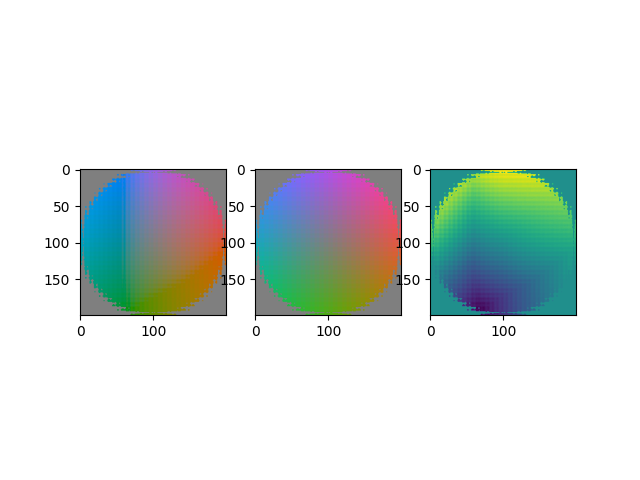

In [11]:
for vmax in (100,):
    fig, axes = plt.subplots(1, 3)
    rgb = rgb_from_2dvector(y=vec[..., 0], x=vec[..., 1], vmax=vmax)
    baseline = CMAP_CIRCULAR_DEFAULT.rgb_from_vector((vec[..., 1], vec[..., 0], 0), vmax=vmax)
    axes[0].imshow(rgb)
    axes[1].imshow(baseline)
    axes[2].imshow(np.linalg.norm(rgb.astype(float) * 255 - baseline.astype(float), axis=-1))

In [60]:
y=100
x=100

In [61]:
rgb_from_2dvector(y=y, x=x)
# array([219,  83,  31], dtype=uint8)

-2.356194490192345
[217 144 132 255]
[ 53.43967766 111.11683922  41.29334668]


array([219,  83,  31], dtype=uint8)

In [59]:
CMAP_CIRCULAR_DEFAULT.rgb_from_vector((x, y, 0))

array([[[ 20, 188,  96],
        [ 20, 188,  96],
        [ 20, 188,  96],
        [ 20, 188,  96]],

       [[ 20, 188,  96],
        [ 20, 188,  96],
        [ 20, 188,  96],
        [ 20, 188,  96]],

       [[ 20, 188,  96],
        [ 20, 188,  96],
        [ 20, 188,  96],
        [ 20, 188,  96]],

       [[ 20, 188,  96],
        [ 20, 188,  96],
        [ 20, 188,  96],
        [ 20, 188,  96]]], dtype=uint8)

In [15]:
from matplotlib import colors, cm

/tmp/ipykernel_1079293/1753449810.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cm.get_cmap('cet_cyclic_isoluminant')


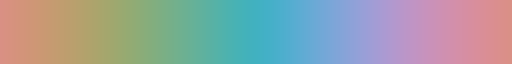

In [16]:
cm.get_cmap('cet_cyclic_isoluminant')

In [17]:
from libertem.viz import rgb_from_2dvector

In [18]:
rgb_from_2dvector(x=0, y=1)

array([219,  83,  31], dtype=uint8)

In [19]:
CMAP_CIRCULAR_DEFAULT.rgb_from_vector((0, 1, 0))

array([ 78, 173,  19], dtype=uint8)

In [20]:
rgb = rgb_from_2dvector(y=vec[..., 0], x=vec[..., 1], vmax=vmax)
    baseline = CMAP_CIRCULAR_DEFAULT.rgb_from_vector((vec[..., 1], vec[..., 0], 0), vmax=vmax)

IndentationError: unexpected indent (1079848635.py, line 2)

In [79]:
np.argmax((1, 2, 3))

np.int64(2)